In [2]:
from time import sleep

import pickle
import numpy as np
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt

from matplotlib import cm

from python_speech_features import logfbank, fbank


# Library for performing speech recognition
# Python 2.6, 2.7, or 3.3+ (required)
# PyAudio 0.2.11+ (required only if you need to use microphone input, Microphone)
# More : https://github.com/Uberi/speech_recognition
import speech_recognition as sr 


In [3]:
print("librosa version : ",librosa.__version__)
print("speech_recognition version : ", sr.__version__)

librosa version :  0.7.2
speech_recognition version :  3.8.1


In [4]:
 """
 Creates a new ``Recognizer`` instance, which represents a collection of speech recognition functionality.
 """
r = sr.Recognizer() 


print("음성 데이터 녹음")
file_name = str(input("이름을 입력하세요 : "))


음성 데이터 녹음
이름을 입력하세요 : helloSubin


In [5]:
    list_0 =sr.Microphone.list_microphone_names()
    for i in range(0, len(list_0)-1):
        print(list_0[i])

HDA Intel PCH: ALC892 Analog (hw:0,0)
HDA Intel PCH: ALC892 Digital (hw:0,1)
HDA Intel PCH: ALC892 Alt Analog (hw:0,2)
HDA NVidia: HDMI 0 (hw:1,3)
HDA NVidia: HDMI 1 (hw:1,7)
HDA NVidia: HDMI 2 (hw:1,8)
HDA NVidia: HDMI 3 (hw:1,9)
Webcam C170: USB Audio (hw:2,0)
sysdefault
front
surround21
surround40
surround41
surround50
surround51
surround71
iec958
spdif
pulse
dmix


In [6]:
 
    # Higher sample_rate result in better audio quality, slower recognition
    # Higher chunk_size help avoid triggering on rapidly changing ambient noise,
    #  but also makes detection less sensitive
    microphone = sr.Microphone(device_index=7, sample_rate=None, chunk_size=1024)
    
    with microphone as source:
        print("15초 동안 녹음을 시작합니다.")
        print("녹음이 시작되면 다음 문장을 읽어주세요.\n")
        
        print("죽는 날까지 하늘을 우러러\n 한 점 부끄러움이 없기를 \
              \n잎새에 이는 바람에도 \n나는 괴로워했다.\n별을 노래하는 마음으로 \
              \n모든 죽어가는 것을 사랑해야지\n그리고 나한테 주어진 길을\n걸어가야겠다")
        
        sleep(4)
        
        
        print("*****   녹음 시작   *****\n")
        
        # This method reads the first second of the file stream 
        # and calibrates the recognizer to the noise level of the audio.
        # adjust_for_ambient_noise는 첫 번째 초에 해당하는 오디오를 듣고 노이즈를 교정하는 메소드
        r.adjust_for_ambient_noise(source, duration=1)
        
        '''
        !! adjust_for_ambient_noise를 사용하면 첫 번째 초를 잃게 됨. -> sleep(4)인 이유
        !! 오디오의 1초는 노이즈 레벨을 판단하는 요소 : duration 으로 조정 가능, 가능한 0.5초 이상인게 좋다.
        !! durations longer than the default of one second generate better results.
        !! durations의 최솟값은 마이크의 주변 환경에 따라 다름.
        '''
        
        # This method takes an audio source as its first argument and
        # records input from the source until silence is detected.
        # microphone의 입력을 감지, 무음이 감지될 때까지 소스의 입력을 기록한다. -> 종료되는 오류의 원인일 가능성    
        audio = r.listen(source , phrase_time_limit=15)
        
        # audio는 AudioData(frame_data, source.SAMPLE_RATE, source.SAMPLE_WIDTH)
        
        
        print(" 녹음 완료. ")
        
        
        # Audio file 저장
        result_name = file_name + "_" + str(0)
        save_path = "./test_train_data/"
        
        if not os.path.exists(save_path + file_name):
            os.makedirs(save_path + file_name)
        
        with open(save_path + file_name + "/" + result_name+".wav", "wb") as f:
            f.write(audio.get_wav_data()) # AudioData to .wav
            print("''"+result_name + "' File Write Finish !")
            
        final_file_name = save_path + file_name + "/" + result_name+".wav"
        print(" Final File Name : "+final_file_name)
        
            

15초 동안 녹음을 시작합니다.
녹음이 시작되면 다음 문장을 읽어주세요.

죽는 날까지 하늘을 우러러
 한 점 부끄러움이 없기를           
잎새에 이는 바람에도 
나는 괴로워했다.
별을 노래하는 마음으로           
모든 죽어가는 것을 사랑해야지
그리고 나한테 주어진 길을
걸어가야겠다
*****   녹음 시작   *****

 녹음 완료. 
''helloSubin_0' File Write Finish !
 Final File Name : ./test_train_data/helloSubin/helloSubin_0.wav


In [7]:
'''
 y: loads and decodes the audio as a time series (one-dimensional NumPy floating point array)
 sr : the sampling rate of y, that is, the number of samples per second of audio
         
 mono=True : 스테레오 타입이면 모노 타입으로 변경 (convert signal to mono)
 duration : only load up to this much audio (in seconds)
'''
        
y, sr = librosa.load(final_file_name, sr=16000, mono=True, duration=15)


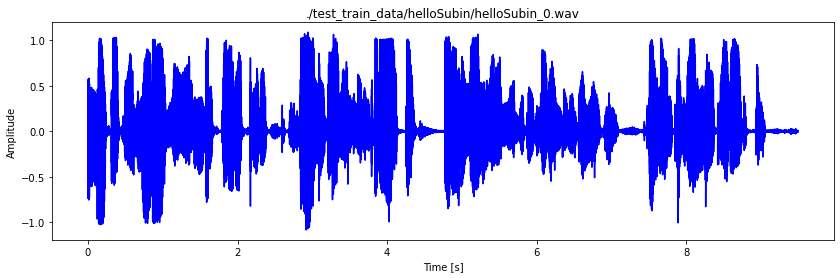

In [9]:
# 0에서 len(y)/sr까지, len(y)개의 요소를 갖는 array
time = np.linspace(0, len(y)/sr, len(y)) # time axis

plt.plot(time, y, color = 'b', label='speech waveform')
plt.xlabel("Time [s]")# x 축
plt.ylabel("Amplitude")# y 축 (진폭)
plt.title(final_file_name) 
plt.rcParams["figure.figsize"] = (14,4)
plt.show()

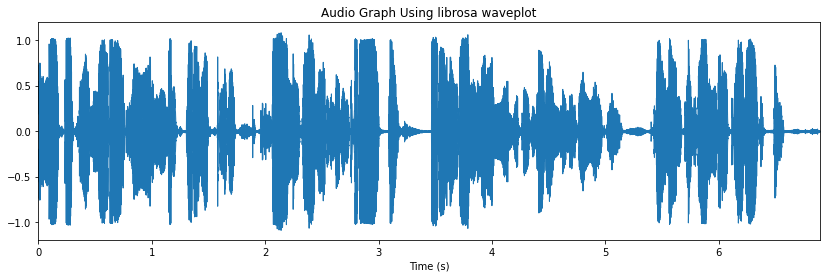

In [10]:
#librosa로 오디오 출력 뽑기
plt.figure()
plt.rcParams["figure.figsize"] = (14,4)
plt.title('Audio Graph Using librosa waveplot')
'''
 y:np.ndarray [shape=(n,) or (2,n)]
 sr:sampling rate of y
 max_points:Maximum number of time-points to plot
 x_axis:str or None, ‘time’, 's'(as seconds), 'ms', etc. 
 max_sr:Maximum sampling rate for the visualization(max_sr > 0)
'''
librosa.display.waveplot(y=y, sr=22050, max_points=50000.0, x_axis='s',offset=0.0, max_sr=1000)


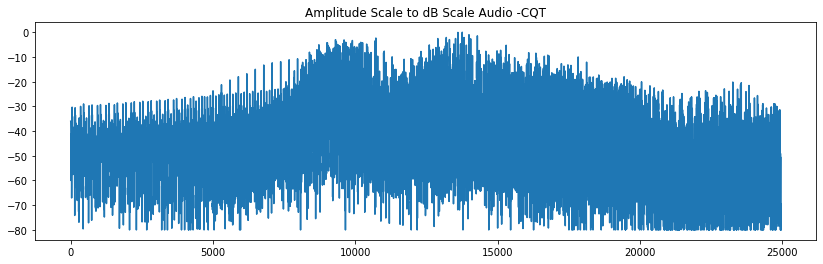

In [11]:
# 진폭 스케일을 데시벨 스케일로 변환
# CQT (푸리에 변환 중 하나로 Constant-Q 변환)
# 이 변환은 주파수 축이 로그 단위로 변환되고, 각 주파수에 따라 해상도가 다양하게 처리되기 때문에(저주파는 저해상도, 고주파는 고해상도)
# 음악을 처리하는 데에 푸리에 변환보다 유리하다고 알려져 있습니다

'''
S:(np.ndarray) input amplitude
abs(S)는 ref: 20 * log10(S / ref)로 조정되며, 출력 0은 S==ref인 위치
amin:minimum threshold for S and ref
top_db :threshold the output at top_db below the peak: max(20 * log10(S)) - top_db
'''
using_CQT_dB = librosa.amplitude_to_db(S=np.abs(librosa.cqt(y, sr=sr)), ref=np.max, amin=1e-05,top_db=80.0)

plt.rcParams["figure.figsize"] = (14,4)
plt.title("Amplitude Scale to dB Scale Audio -CQT")
# plt.xlim(0, 100)
plt.plot(using_CQT_dB.flatten())


# Now, the weaker the signal power, the more negative the dBm value.
# A signal with a -70 dBm power level is a very low power signal.

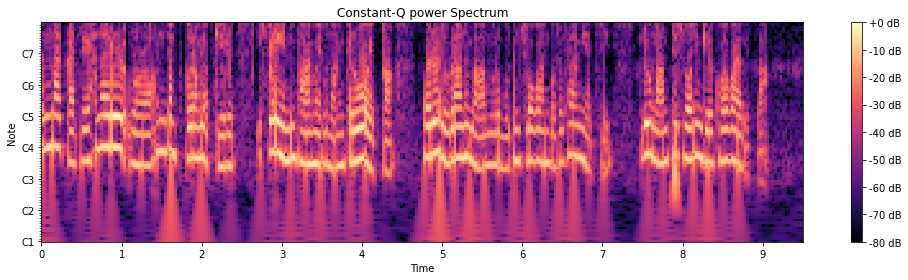

In [12]:
librosa.display.specshow(using_CQT_dB, sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power Spectrum')
plt.tight_layout()
plt.show()

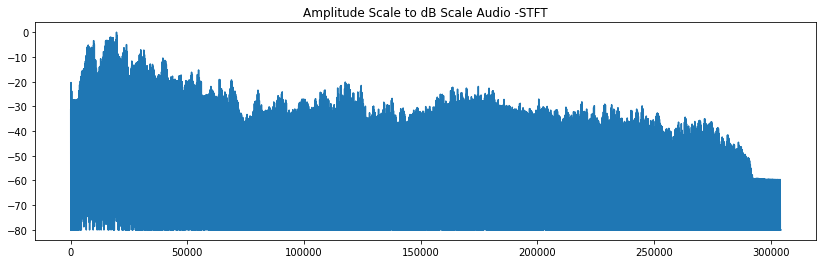

In [13]:
#진폭 스케일을 데시벨 스케일로 변환
#STFT
'''
S:(np.ndarray) input amplitude
abs(S)는 ref: 20 * log10(S / ref)로 조정되며, 출력 0은 S==ref인 위치
amin:minimum threshold for S and ref
top_db :threshold the output at top_db below the peak: max(20 * log10(S)) - top_db
'''
using_STFT_dB= librosa.amplitude_to_db(S=np.abs(librosa.stft(y)), ref=np.max, amin=1e-05,top_db=80.0)
plt.rcParams["figure.figsize"] = (14,4)
plt.title("Amplitude Scale to dB Scale Audio -STFT")
# plt.xlim(0, 100)
plt.plot(using_STFT_dB.flatten())

# Now, the weaker the signal power, the more negative the dBm value.
# A signal with a -70 dBm power level is a very low power signal.

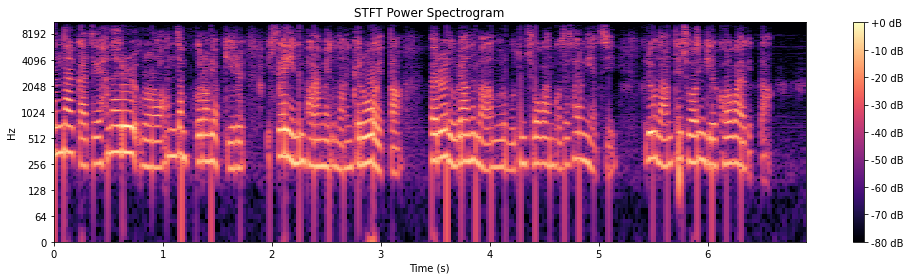

In [14]:
librosa.display.specshow(using_STFT_dB, x_coords=None, y_coords=None, x_axis='s', y_axis='log', sr=22050, hop_length=512, fmin=None, fmax=None, tuning=0.0, bins_per_octave=12)
plt.title('STFT Power Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

/home/subin/.local/lib/python3.6/site-packages/librosa/filters.py:235: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


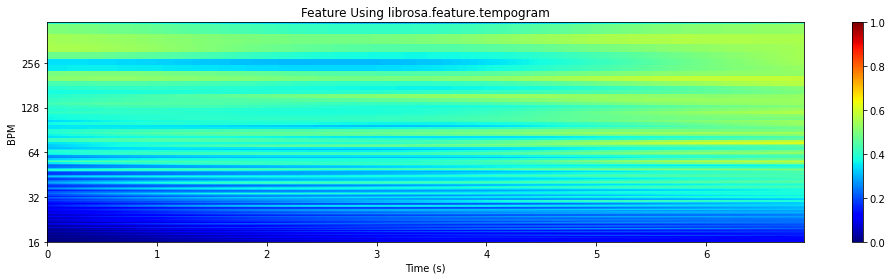

In [15]:
'''
 A tempogram is a time-pulse representation of an audio signal 
 laid out such that it indicates the variation of pulse strength.
 
 Tempogram은 pulse 강도의 변화를 나타낸다.
'''

Tgram = librosa.feature.tempogram(y=y, sr=16000)

librosa.display.specshow(Tgram, x_coords=None, y_coords=None, x_axis='s', y_axis='tempo', sr=22050, hop_length=512, fmin=None, fmax=None, tuning=0.0, bins_per_octave=12,cmap=cm.jet)
plt.colorbar()
plt.title('Feature Using librosa.feature.tempogram')
plt.tight_layout()
plt.show()

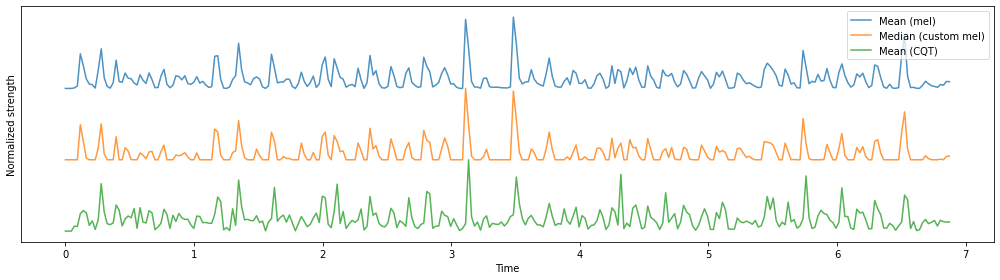

In [16]:
'''
 onset strength는 발병 강도를 나타낸다.
'''

plt.figure()
times = librosa.times_like(using_STFT_dB)

# standard onset function
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
plt.plot(times, 2 + onset_env / onset_env.max(), alpha=0.8, label='Mean (mel)')

# Median aggregation, and custom mel options
onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median,fmax=8000, n_mels=256)
plt.plot(times, 1 + onset_env / onset_env.max(), alpha=0.8, label='Median (custom mel)')

# Constant-Q spectrogram instead of Mel
onset_env = librosa.onset.onset_strength(sr=sr, S=using_CQT_dB)
plt.plot(times, onset_env / onset_env.max(), alpha=0.8, label='Mean (CQT)')
plt.legend(frameon=True, framealpha=0.75)
plt.ylabel('Normalized strength')
plt.xlabel('Time')
plt.yticks([])
plt.axis('tight')
plt.tight_layout()
plt.show()

In [17]:
# FBANK 적용
'''
 :param samplerate : the samplerate of the signal we are working with.
 :param winlen : the length of the analysis window in seconds. Default is 0.025s
 :param winstep : the step between successive windows in seconds. Default is 0.01s (10 milliseconds)
 :param nfft : the FFT size. Default is 512.
 :param winfunc : the analysis window to apply to each frame. (hamming window)
 :param preemph: apply preemphasis filter with preemph as coefficient. 0 is no filter. 
                 Default is 0.97. (고주파 증폭, 일반적으로 α는 0.95 또는 0.97)

 :returns
 filter_banks : a numpy array of size (NUMFRAMES by nfilt) containing features. Each row holds 1 feature vector. 
 energies : value is the energy in each frame (total energy, unwindowed)
'''
filter_banks, energies = fbank(y, samplerate=16000, nfilt=40, winlen=0.025,winfunc=np.hamming)

# dB = 10 log^10 (Power Ratio) = 20 log^10 (Voltage Ratio)
# Linear Scale은 그들이 가지고 있는 Amplitude를 그대로 나타내는 것이고,
# 반면에 Decibel Scale은 Linear Scale을 Log Scale로 변환 시킨것이다.

filter_banks_dB = 20 * np.log10(np.maximum(filter_banks, 1e-5)) #dB 단위로 표시하기 위함
feature = (filter_banks_dB - np.mean(filter_banks_dB, axis=0)) # normalize, 모든 프레임에서 각 계수의 평균을 뺀다.


print(feature)
print("\n Why use Decibel to display data? :\n\t http://digital.ni.com/public.nsf/allkb/8A93302DFBA0654D86256F32000C9CCB")


[[ -0.3825728   -1.03751454 -20.56656447 ...  17.28768833  -5.85307388
  -13.3013588 ]
 [ -0.3825728   -1.03751454 -20.56656447 ...   4.20953205  -2.95591714
  -13.3013588 ]
 [ -0.3825728   -1.03751454 -20.56656447 ... -11.11378723 -14.08186192
  -13.3013588 ]
 ...
 [ -0.3825728   -1.03751454 -20.56656447 ... -30.10896173 -22.85708668
  -13.3013588 ]
 [ -0.3825728   -1.03751454 -20.56656447 ... -30.10896173 -22.85708668
  -13.3013588 ]
 [ -0.3825728   -1.03751454 -20.56656447 ... -30.10896173 -22.85708668
  -13.3013588 ]]

 Why use Decibel to display data? :
	 http://digital.ni.com/public.nsf/allkb/8A93302DFBA0654D86256F32000C9CCB


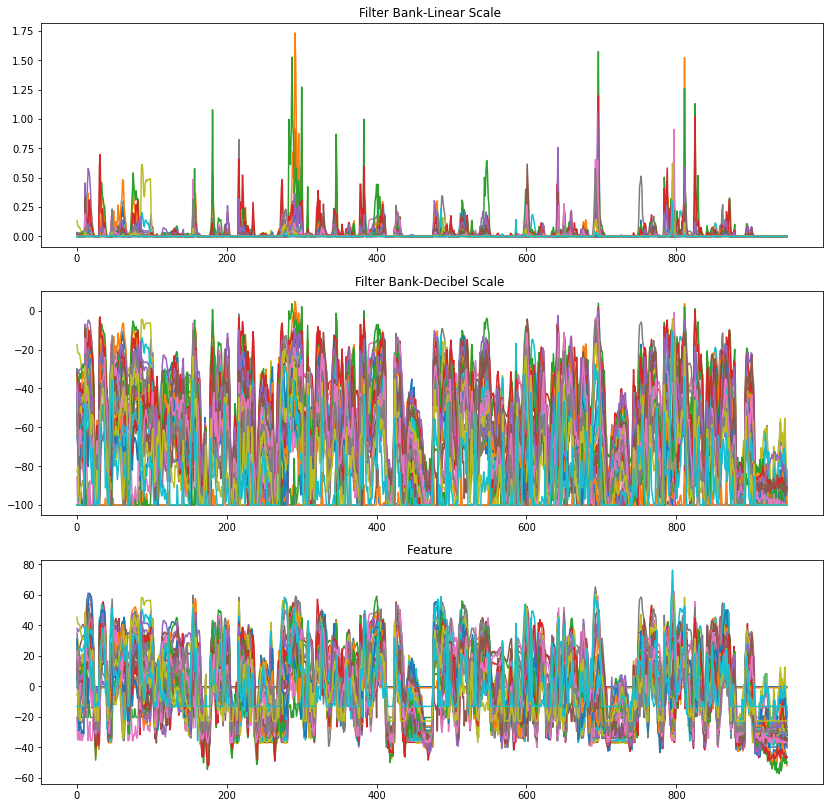

In [18]:
plt.rcParams["figure.figsize"] = (14,14)
plt.subplot(3,1,1)
plt.title('Filter Bank-Linear Scale ')
plt.plot(filter_banks)

plt.subplot(3,1,2)
plt.title('Filter Bank-Decibel Scale ')
plt.plot(filter_banks_dB)

plt.subplot(3,1,3)
plt.title('Feature ')
plt.plot(feature)

plt.show()

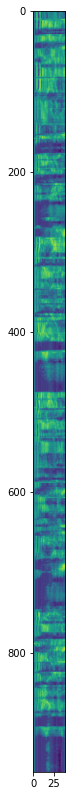

In [19]:
plt.imshow(feature)
plt.show()

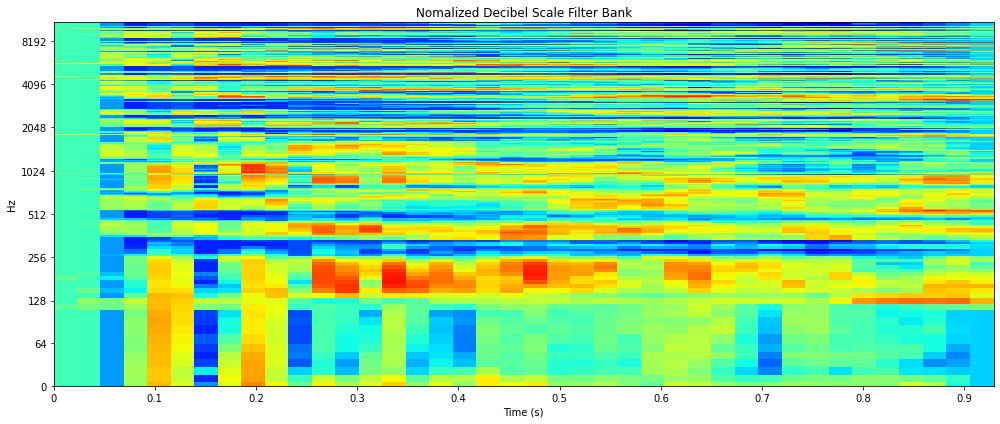

In [22]:
librosa.display.specshow(feature, x_coords=None, y_coords=None, x_axis='s', y_axis='log', sr=22050, hop_length=512, fmin=None, fmax=None, tuning=0.0, bins_per_octave=12,cmap=cm.jet)
plt.rcParams["figure.figsize"] = (14,6)
plt.title('Nomalized Decibel Scale Filter Bank')
# plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()